<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

Импортируем нужные нам библиотеки 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer
from sklearn.dummy import DummyRegressor
RND_ST = np.random.RandomState(12345)

Загружаем датасеты

In [2]:
df_train = pd.read_csv('/datasets/gold_industry_train.csv')
df_test = pd.read_csv('/datasets/gold_industry_test.csv')
df_full = pd.read_csv('/datasets/gold_industry_full.csv')

Пишем функцию для получения полных данных о каждом отдельном датасете

In [3]:
def info_func(df):
    print('Общая информация')
    print('')
    print(df.info())
    print('')
    print(df.describe())
    print('')
    print('Кол-во строк дубликатов')
    print('')
    print(df[df.duplicated()].count().sort_values(ascending=False))
    print('')
    print('Кол-во пропущенных значений')
    print('')
    print(df.isna().sum().sort_values(ascending=False))
    print('')
    print('Процент пропущенных значений')
    print('')
    print((df.isna().sum()/len(df)*100).sort_values(ascending=False))
    df.fillna(method='bfill')
    print('')
    print('Приводим date к нужному типу данных')
    print('')
    df.hist(bins=30, figsize=(40,40), legend = True)
    plt.show()
    

Общая информация

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14579 entries, 0 to 14578
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14579 non-null  object 
 1   rougher.input.feed_au                               14579 non-null  float64
 2   rougher.input.feed_ag                               14579 non-null  float64
 3   rougher.input.feed_pb                               14507 non-null  float64
 4   rougher.input.feed_sol                              14502 non-null  float64
 5   rougher.input.feed_rate                             14572 non-null  float64
 6   rougher.input.feed_size                             14478 non-null  float64
 7   rougher.input.floatbank10_sulfate                   14548 non-null  float64
 8   rougher.input.floatbank10_xanthate                  14572 

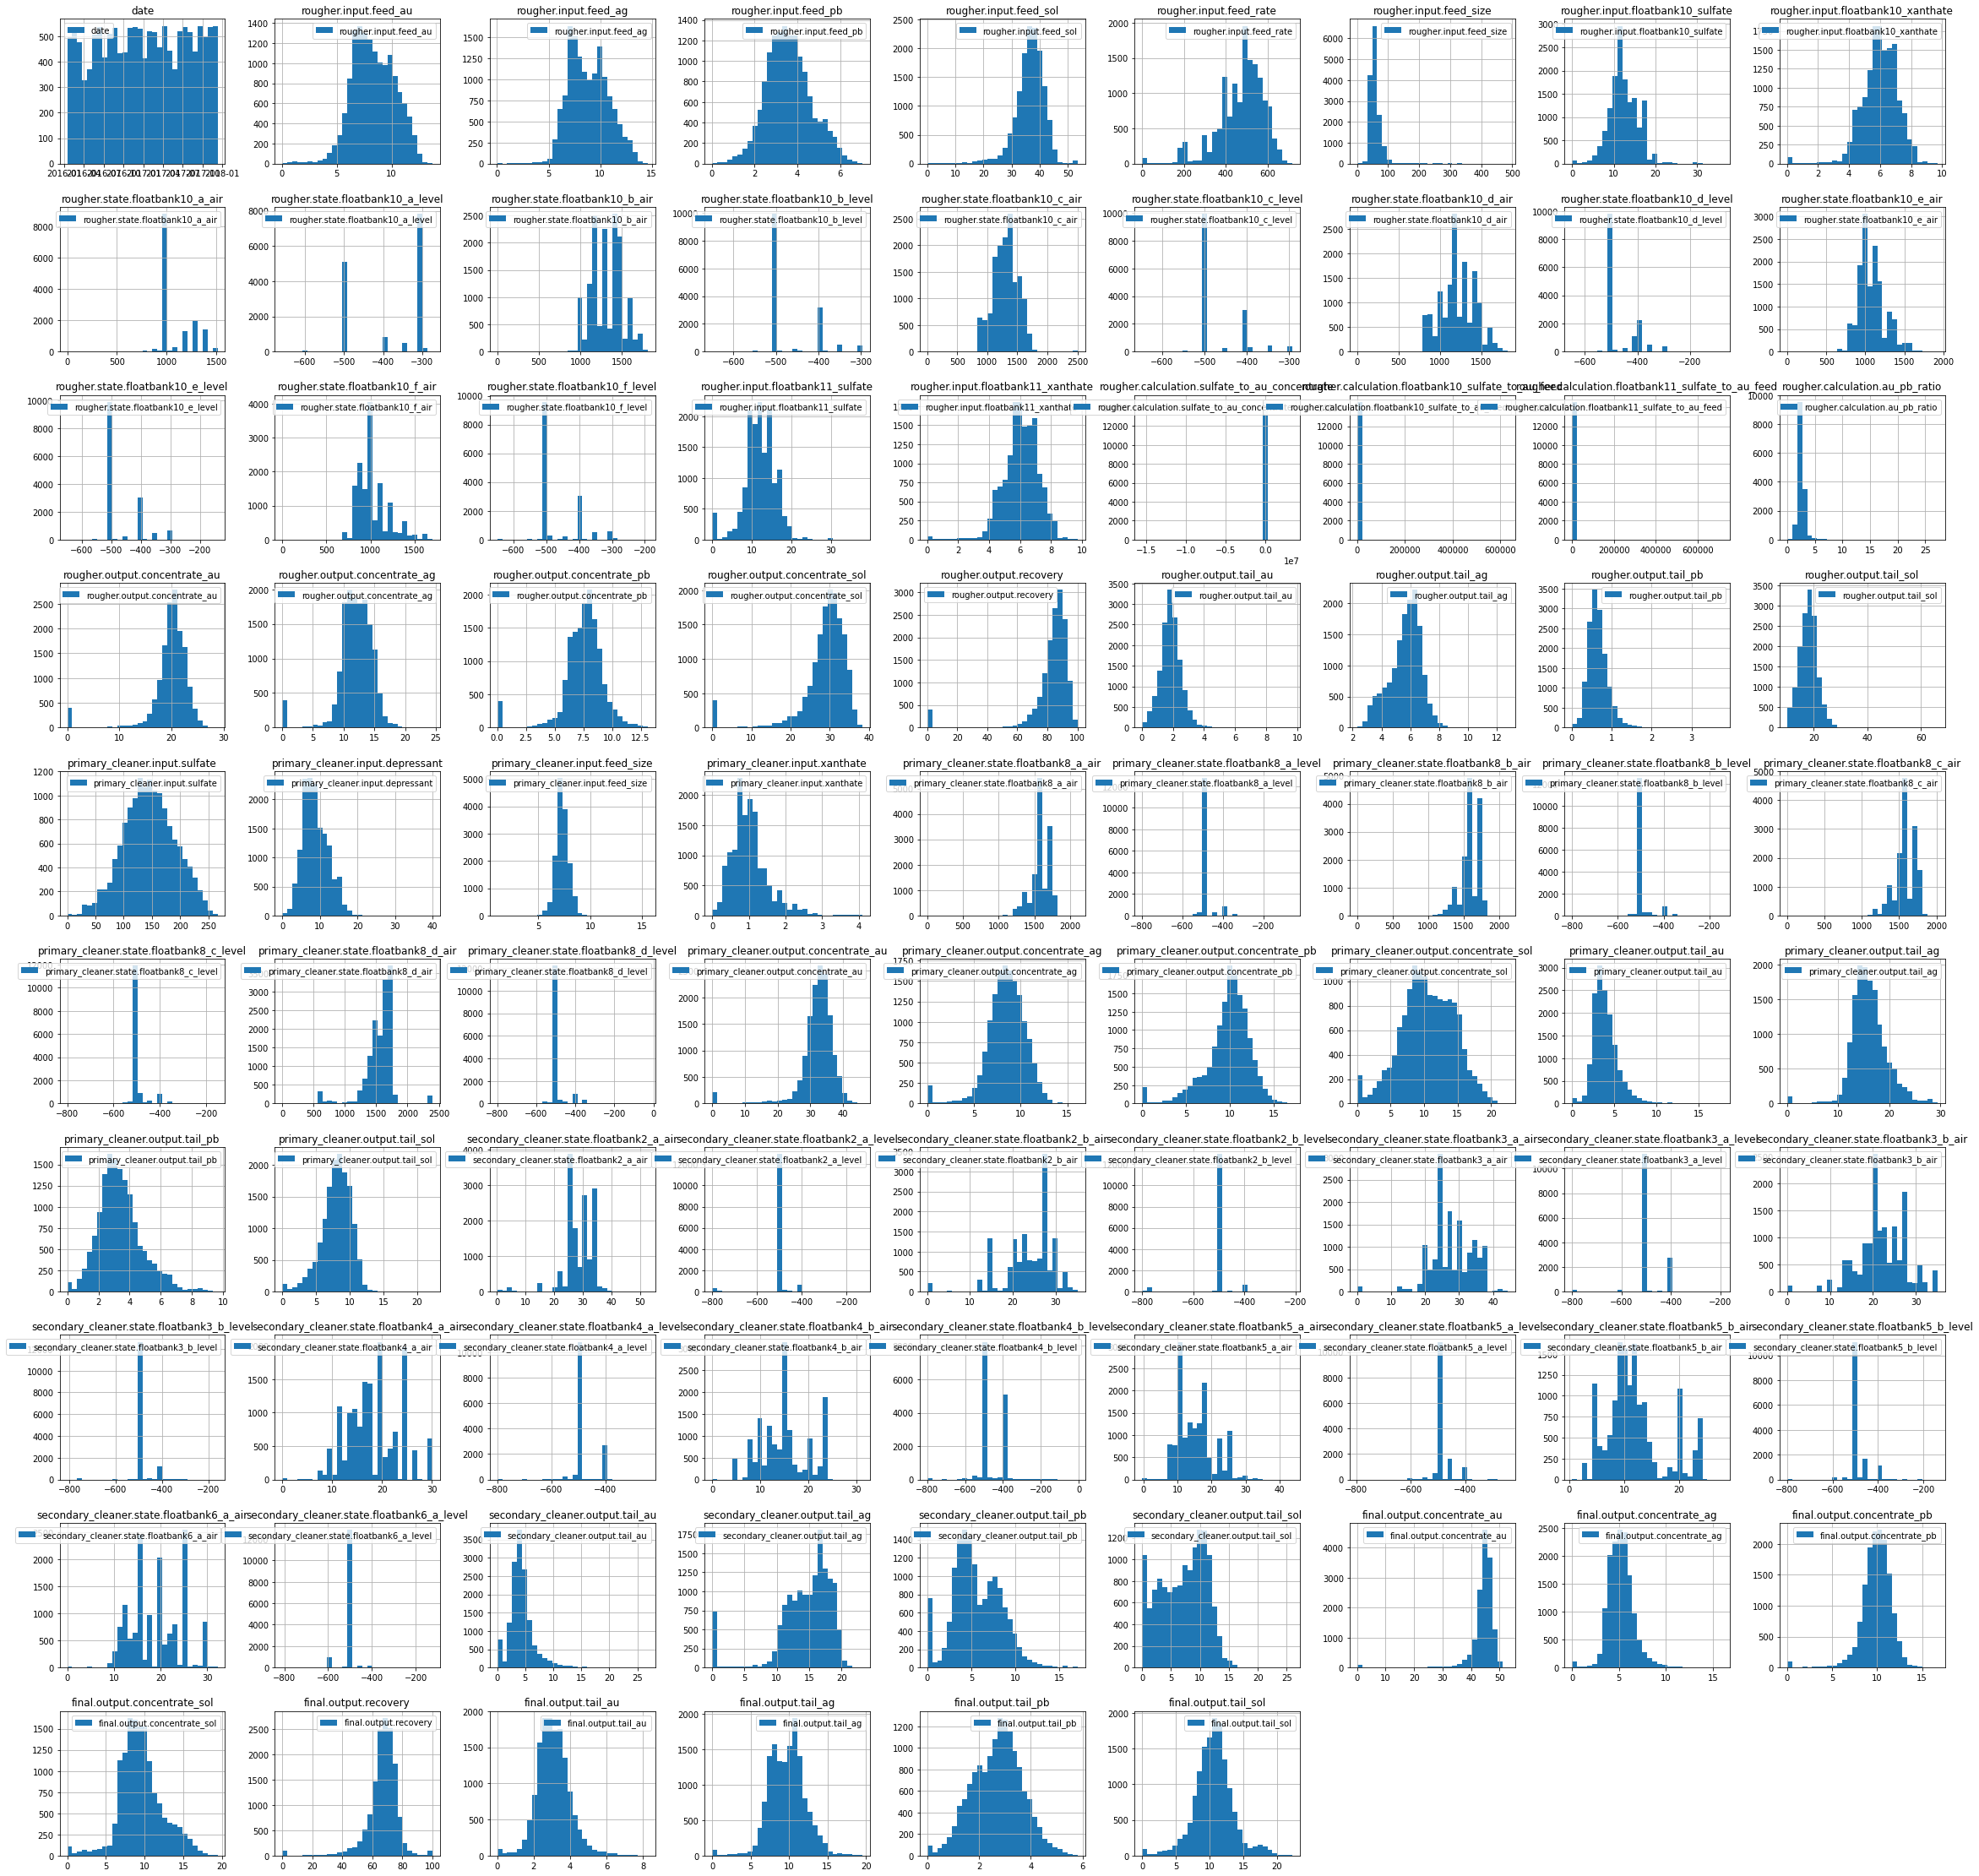

In [4]:
info_func(df_train)

Общая информация

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4860 entries, 0 to 4859
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        4860 non-null   object 
 1   rougher.input.feed_au                       4860 non-null   float64
 2   rougher.input.feed_ag                       4860 non-null   float64
 3   rougher.input.feed_pb                       4832 non-null   float64
 4   rougher.input.feed_sol                      4838 non-null   float64
 5   rougher.input.feed_rate                     4856 non-null   float64
 6   rougher.input.feed_size                     4816 non-null   float64
 7   rougher.input.floatbank10_sulfate           4857 non-null   float64
 8   rougher.input.floatbank10_xanthate          4859 non-null   float64
 9   rougher.state.floatbank10_a_air             4859 non-null   float64

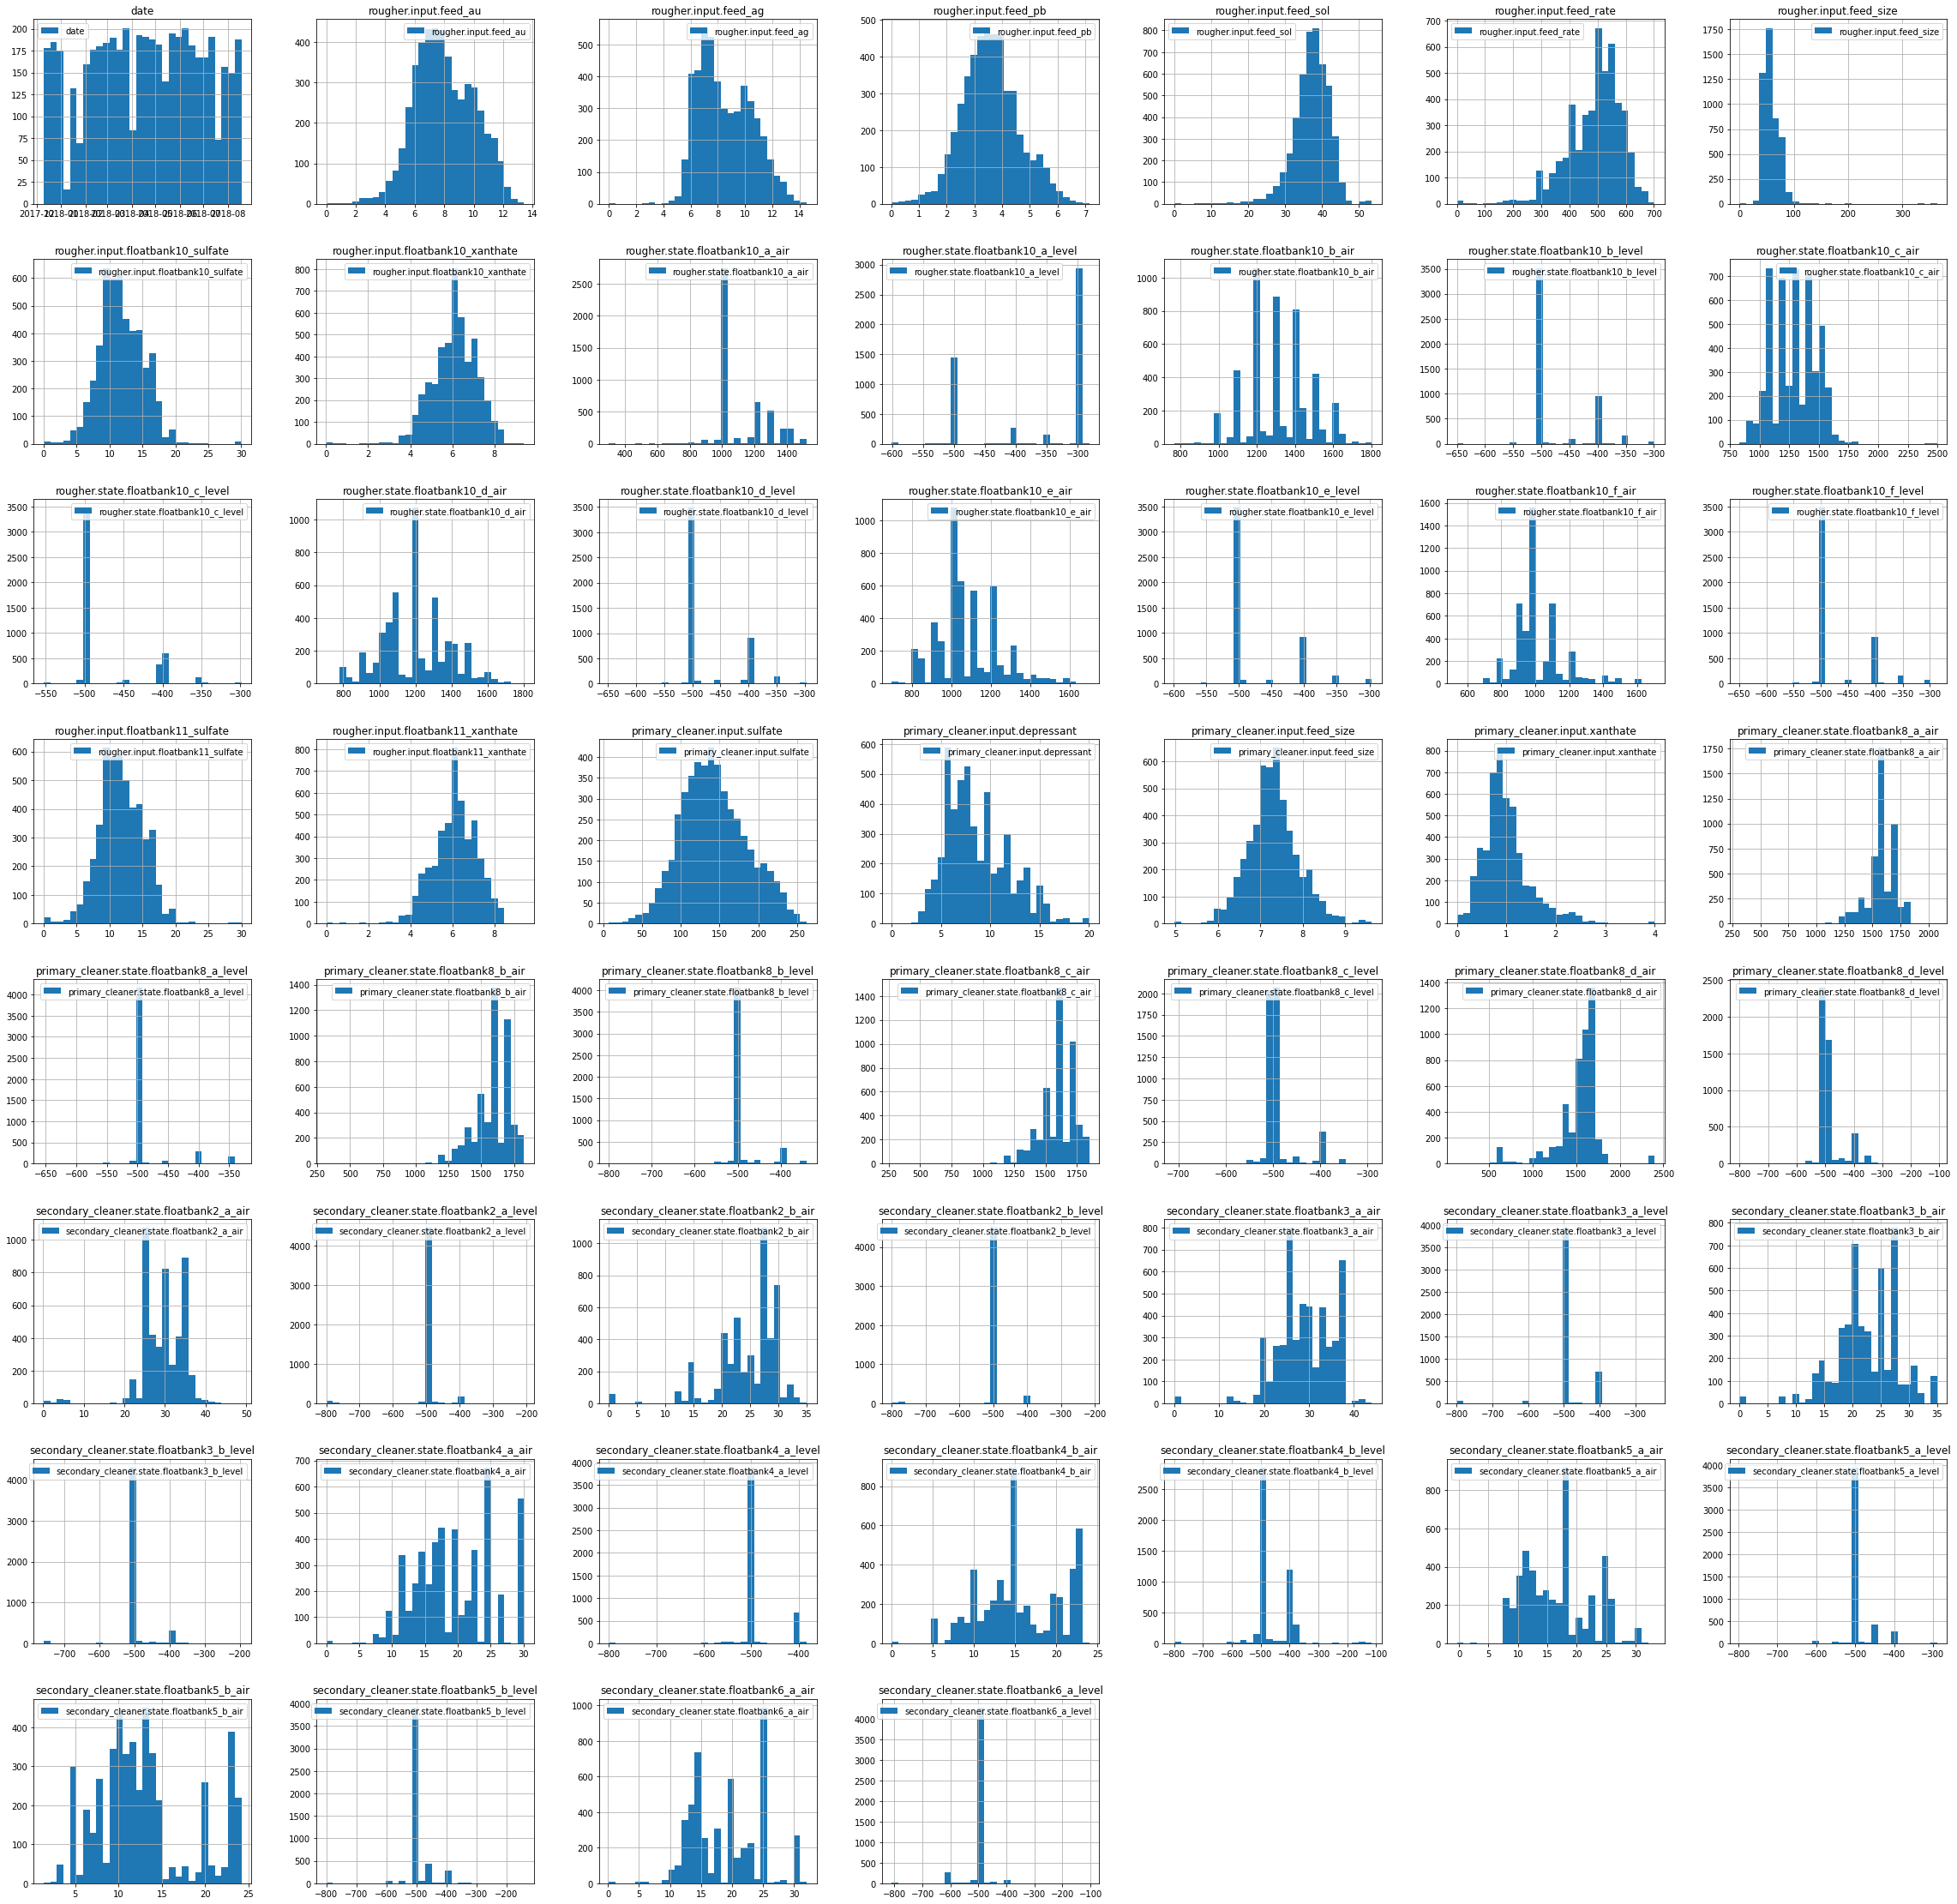

In [5]:
info_func(df_test)

Общая информация

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   rougher.input.feed_au                               19439 non-null  float64
 2   rougher.input.feed_ag                               19439 non-null  float64
 3   rougher.input.feed_pb                               19339 non-null  float64
 4   rougher.input.feed_sol                              19340 non-null  float64
 5   rougher.input.feed_rate                             19428 non-null  float64
 6   rougher.input.feed_size                             19294 non-null  float64
 7   rougher.input.floatbank10_sulfate                   19405 non-null  float64
 8   rougher.input.floatbank10_xanthate                  19431 

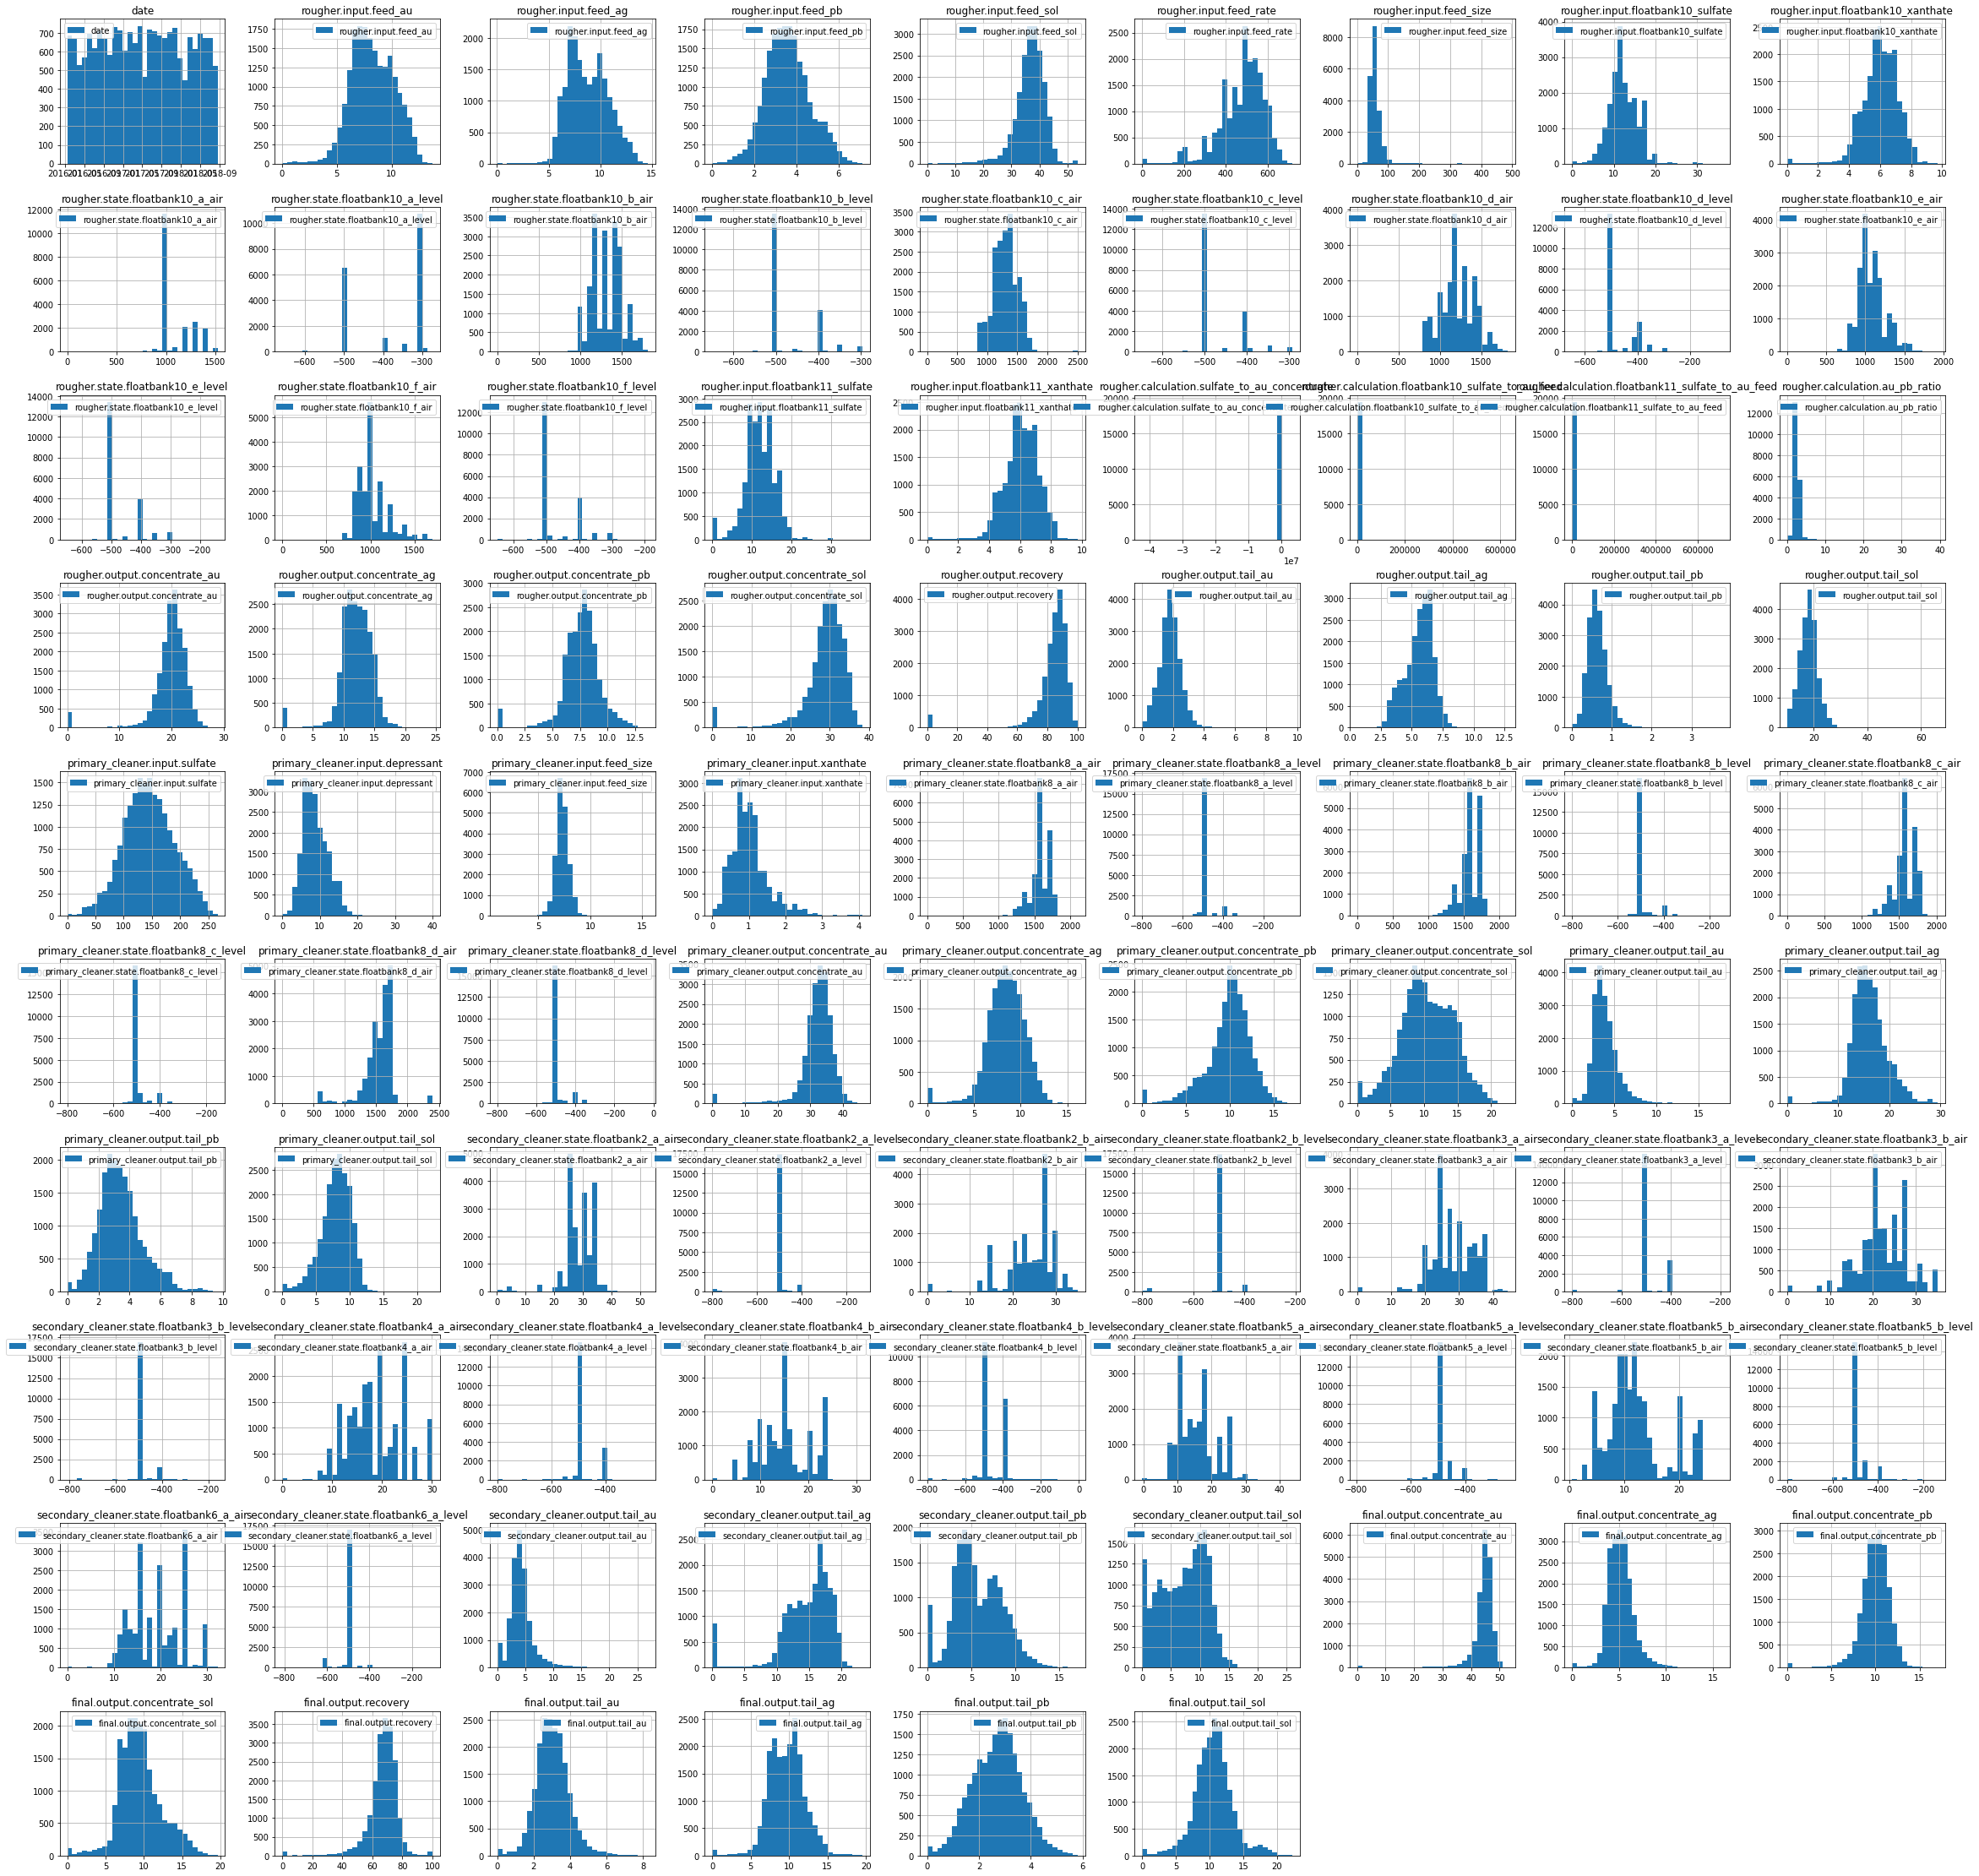

In [6]:
info_func(df_full)

Заполняем пропущенные значения методом bfill. Кол-во пропущенных значений около 16% в df_full. Не представляется возможным заполнить их адекватными значениями - поэтому было принято решение заполнить их существующими значениями, чтобы не сильно исказить данные.

In [7]:
df_full = df_full.fillna(method='bfill')
df_train= df_train.fillna(method='bfill') 
df_test = df_test.fillna(method='bfill')

Смотрим какие выборки были исключены из тестовой выборки

In [8]:
miss = pd.Series(list(set(df_train.columns) - set(df_test.columns)))
display(miss.sort_values())

29                          final.output.concentrate_ag
22                          final.output.concentrate_au
10                          final.output.concentrate_pb
27                         final.output.concentrate_sol
6                                 final.output.recovery
17                                 final.output.tail_ag
13                                 final.output.tail_au
32                                 final.output.tail_pb
21                                final.output.tail_sol
14                primary_cleaner.output.concentrate_ag
12                primary_cleaner.output.concentrate_au
4                 primary_cleaner.output.concentrate_pb
1                primary_cleaner.output.concentrate_sol
2                        primary_cleaner.output.tail_ag
0                        primary_cleaner.output.tail_au
20                       primary_cleaner.output.tail_pb
7                       primary_cleaner.output.tail_sol
33                      rougher.calculation.au_p

Параметры, исключенные из тестовой выборки - представляют собой итоговые результаты после каждого технологического этапа или их расчет. Присутствие признаков вызвало бы мультиколлинеарность и может стать причиной переобучаемости модели - что повлечет за собой неверные результаты. Целевые параметры в рамках проекта (final.output.recovery и rougher.output.recovery) также исключены из тестовой выборки. Исключенные параметры недоступны в тестовой выборке, потому что замеряются и/или рассчитываются значительно позже. Для моделей прогнозирования целевые признаки для тестовой выборки потребуют восстановления

Проверяем значение MAE на обучающей выборке на этапе флотации на эффективность обогащения. Выводим значения из таблицы.

In [9]:
df_train['rougher.output.recovery'].describe()

count    14579.000000
mean        82.521200
std         15.797521
min          0.000000
25%         80.558542
50%         85.946497
75%         89.960375
max        100.000000
Name: rougher.output.recovery, dtype: float64

Выводим значения, которые мы посчитали самостоятельно.

In [10]:
df_train['ror_check'] = (df_train['rougher.output.concentrate_au']\
                           * (df_train['rougher.input.feed_au'] - df_train['rougher.output.tail_au']))\
                           / (df_train['rougher.input.feed_au']\
                           * (df_train['rougher.output.concentrate_au'] - df_train['rougher.output.tail_au']))\
                           * 100
display(df_train['ror_check'].describe())

count    14579.000000
mean        82.521200
std         15.797521
min         -0.000000
25%         80.558542
50%         85.946497
75%         89.960375
max        100.000000
Name: ror_check, dtype: float64

Смотрим на значение MAE

In [11]:
mean_absolute_error(df_train['rougher.output.recovery'], df_train['ror_check'])

9.83758577644259e-15

Значение MAE стремится к нулю. Получается, что rougher.output.recovery в таблице и посчитанный нами - идентичны.

Удаляем ранее добавленный столбец для проверки

In [12]:
del df_train['ror_check']

Как мы заметили ранее - присутствуют значения равные 0. что вероятно является ошибкой и может повлиять на предсказания модели. Стоит удалить эти значения, чтобы получить более точные результаты. Посмотрим сколько строк у нас имеют 0 на каждом этапе очистки. также вычислим сумму металлов на каждом этапе очистке для последующего анализа.

In [13]:
print('Описательная статистика концентрации всех веществ в изначальном сырье')
print('')
df_full['concetrate_base_sum'] = df_full['rougher.input.feed_ag'] + df_full['rougher.input.feed_pb'] + df_full['rougher.input.feed_au']
display(df_full['concetrate_base_sum'].describe())

Описательная статистика концентрации всех веществ в изначальном сырье



count    19439.000000
mean        20.647454
std          4.476618
min          0.030000
25%         17.252879
50%         20.141216
75%         23.797381
max         33.498784
Name: concetrate_base_sum, dtype: float64

In [14]:
print('Описательная статистика концентрации всех веществ в черновом концентрате')
print('')
df_full['concetrate_rougher_sum'] = df_full['rougher.output.concentrate_ag'] + df_full['rougher.output.concentrate_pb'] + df_full['rougher.output.concentrate_au']
display(df_full['concetrate_rougher_sum'].describe())

Описательная статистика концентрации всех веществ в черновом концентрате



count    19439.000000
mean        39.373032
std          6.863389
min          0.000000
25%         38.394639
50%         40.312648
75%         42.365102
max         55.568687
Name: concetrate_rougher_sum, dtype: float64

In [15]:
print('Описательная статистика концентрации всех веществ после первичной очистки')
print('')
df_full['concetrate_primary_sum'] = df_full['primary_cleaner.output.concentrate_ag'] + df_full['primary_cleaner.output.concentrate_pb'] + df_full['primary_cleaner.output.concentrate_au']
display(df_full['concetrate_primary_sum'].describe())

Описательная статистика концентрации всех веществ после первичной очистки



count    19439.000000
mean        50.373278
std          7.627369
min          0.000000
25%         50.053165
50%         51.909156
75%         53.386898
max         60.269003
Name: concetrate_primary_sum, dtype: float64

In [16]:
print('Описательная статистика концентрации всех веществ в финальном концентрате')
print('')
df_full['concetrate_final_sum'] = df_full['final.output.concentrate_ag'] + df_full['final.output.concentrate_pb'] + df_full['final.output.concentrate_au']
display(df_full['concetrate_final_sum'].describe())

Описательная статистика концентрации всех веществ в финальном концентрате



count    19439.000000
mean        59.223712
std          6.095166
min          0.000000
25%         59.298323
50%         60.306921
75%         61.096667
max         64.968881
Name: concetrate_final_sum, dtype: float64

In [17]:
df_full_sum_null_base = df_full[df_full['concetrate_base_sum'] == 0]
display(df_full_sum_null_base.shape)

(0, 91)

In [18]:
df_full_sum_null_rougher = df_full[df_full['concetrate_rougher_sum'] == 0]
display(df_full_sum_null_rougher.shape)

(394, 91)

In [19]:
df_full_sum_null_primary = df_full[df_full['concetrate_primary_sum'] == 0]
display(df_full_sum_null_primary.shape)

(108, 91)

In [20]:
df_full_sum_null_final = df_full[df_full['concetrate_final_sum'] == 0]
display(df_full_sum_null_final.shape)

(98, 91)

In [21]:
display(df_full.shape)
display(df_train.shape)

(19439, 91)

(14579, 87)

Такие же строки есть и в тренировочной выборке - создадим столбцы с суммой, чтобы удалить эти строки

In [22]:
df_train['concetrate_base_sum'] = df_train['rougher.input.feed_ag'] + df_train['rougher.input.feed_pb'] + df_train['rougher.input.feed_au']
df_train['concetrate_rougher_sum'] = df_train['rougher.output.concentrate_ag'] + df_train['rougher.output.concentrate_pb'] + df_train['rougher.output.concentrate_au']
df_train['concetrate_primary_sum'] = df_train['primary_cleaner.output.concentrate_ag'] + df_train['primary_cleaner.output.concentrate_pb'] + df_train['primary_cleaner.output.concentrate_au']
df_train['concetrate_final_sum'] = df_train['final.output.concentrate_ag'] + df_train['final.output.concentrate_pb'] + df_train['final.output.concentrate_au']

In [23]:
df_full = df_full[df_full['concetrate_base_sum'] > 0]
df_full = df_full[df_full['concetrate_rougher_sum'] > 0]
df_full = df_full[df_full['concetrate_primary_sum'] > 0]
df_full = df_full[df_full['concetrate_final_sum'] > 0]
df_train = df_train[df_train['concetrate_base_sum'] > 0]
df_train = df_train[df_train['concetrate_rougher_sum'] > 0]
df_train = df_train[df_train['concetrate_primary_sum'] > 0]
df_train = df_train[df_train['concetrate_final_sum'] > 0]

display(df_full.shape)
display(df_train.shape)

(18848, 91)

(13988, 91)

### Вывод
* обработали пропуски методом bfill
* рассчитали суммарную концентрацию металлов на каждом этапе для последующего анализа
* избавились от строк с нулевым значением - это явный выброс
* rougher.output.recovery в таблице и посчитанный нами - идентичны - следовательно модель должна считаться нормально

## Анализ данных

Cмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах: в сырье, в черновом концентрате, в концентрате после первой очистки и в финальном концентрате.

In [24]:
# берем только значения больше 0 - потому что в датасете есть нулевые значения по этим параметрам - они нас не интересуют
print('Концентрация Ag в сырье')
print('')
print(df_full[df_full['rougher.input.feed_ag']>0]['rougher.input.feed_ag'].describe())
print('')
print('Концентрация Ag после флотации')
print('')
print(df_full[df_full['rougher.output.concentrate_ag']>0]['rougher.output.concentrate_ag'].describe())
print('')
print('Концентрация Ag после первого этапа очистки')
print('')
print(df_full[df_full['primary_cleaner.output.concentrate_ag']>0]['primary_cleaner.output.concentrate_ag'].describe())
print('')
print('Концентрация Ag в финальном концентрате')
print('')
print(df_full[df_full['final.output.concentrate_ag']>0]['final.output.concentrate_ag'].describe())

Концентрация Ag в сырье

count    18848.000000
mean         8.788434
std          1.933413
min          0.010000
25%          7.223590
50%          8.593648
75%         10.211405
max         14.596026
Name: rougher.input.feed_ag, dtype: float64

Концентрация Ag после флотации

count    18848.000000
mean        12.247636
std          2.135589
min          0.010000
25%         10.713424
50%         12.172251
75%         13.767504
max         24.480271
Name: rougher.output.concentrate_ag, dtype: float64

Концентрация Ag после первого этапа очистки

count    18848.000000
mean         8.504701
std          1.955238
min          0.010000
25%          7.303424
50%          8.534805
75%          9.824846
max         16.081632
Name: primary_cleaner.output.concentrate_ag, dtype: float64

Концентрация Ag в финальном концентрате

count    18848.000000
mean         5.198955
std          1.326200
min          0.010000
25%          4.271088
50%          5.079826
75%          5.898205
max         16.0

In [25]:
# берем только значения больше 0 - потому что в датасете есть нулевые значения по этим параметрам - они нас не интересуют
print('Концентрация Pb в сырье')
print('')
print(df_full[df_full['rougher.input.feed_pb']>0]['rougher.input.feed_pb'].describe())
print('')
print('Концентрация Pb после флотации')
print('')
print(df_full[df_full['rougher.output.concentrate_pb']>0]['rougher.output.concentrate_pb'].describe())
print('')
print('Концентрация Pb после первого этапа очистки')
print('')
print(df_full[df_full['primary_cleaner.output.concentrate_pb']>0]['primary_cleaner.output.concentrate_pb'].describe())
print('')
print('Концентрация Pb в финальном концентрате')
print('')
print(df_full[df_full['final.output.concentrate_pb']>0]['final.output.concentrate_pb'].describe())

Концентрация Pb в сырье

count    18848.000000
mean         3.581230
std          1.059248
min          0.010000
25%          2.868384
50%          3.521759
75%          4.238615
max          7.142594
Name: rougher.input.feed_pb, dtype: float64

Концентрация Pb после флотации

count    18848.000000
mean         7.758299
std          1.433829
min          0.010000
25%          6.794956
50%          7.769811
75%          8.581975
max         13.617072
Name: rougher.output.concentrate_pb, dtype: float64

Концентрация Pb после первого этапа очистки

count    18845.000000
mean         9.862573
std          2.465291
min          0.010000
25%          8.697650
50%         10.144736
75%         11.412167
max         17.081278
Name: primary_cleaner.output.concentrate_pb, dtype: float64

Концентрация Pb в финальном концентрате

count    18848.000000
mean        10.030313
std          1.510459
min          0.010000
25%          9.148408
50%         10.110375
75%         11.049269
max         17.0

In [26]:
# берем только значения больше 0 - потому что в датасете есть нулевые значения по этим параметрам - они нас не интересуют
print('Концентрация Au в сырье')
print('')
print(df_full[df_full['rougher.input.feed_au']>0]['rougher.input.feed_au'].describe())
print('')
print('Концентрация Au после флотации')
print('')
print(df_full[df_full['rougher.output.concentrate_au']>0]['rougher.output.concentrate_au'].describe())
print('')
print('Концентрация Au после первого этапа очистки')
print('')
print(df_full[df_full['primary_cleaner.output.concentrate_au']>0]['primary_cleaner.output.concentrate_au'].describe())
print('')
print('Концентрация Au в финальном концентрате')
print('')
print(df_full[df_full['final.output.concentrate_au']>0]['final.output.concentrate_au'].describe())

Концентрация Au в сырье

count    18848.000000
mean         8.257151
std          1.953883
min          0.010000
25%          6.839886
50%          8.123340
75%          9.769256
max         13.731330
Name: rougher.input.feed_au, dtype: float64

Концентрация Au после флотации

count    18848.000000
mean        20.182361
std          2.464625
min          0.010000
25%         18.925843
50%         20.327484
75%         21.755940
max         28.824507
Name: rougher.output.concentrate_au, dtype: float64

Концентрация Au после первого этапа очистки

count    18848.000000
mean        32.273152
std          5.072050
min          0.010000
25%         30.493421
50%         32.822593
75%         35.019177
max         45.933934
Name: primary_cleaner.output.concentrate_au, dtype: float64

Концентрация Au в финальном концентрате

count    18848.000000
mean        44.292759
std          4.014120
min          0.010000
25%         43.424311
50%         45.010693
75%         46.262709
max         52.7

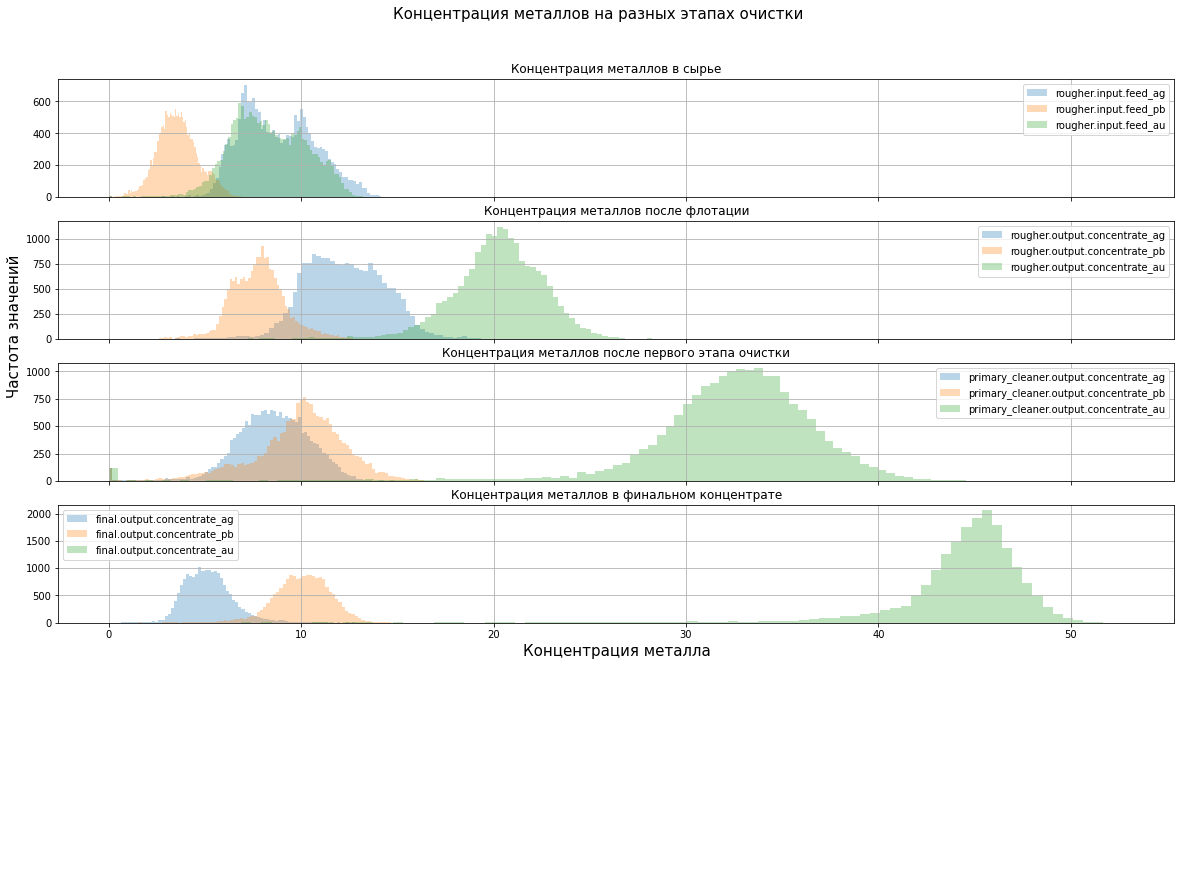

In [27]:
fig, ax = plt.subplots(4, 1, sharex='all')
fig.set_figheight(10)
fig.set_figwidth(20)
fig.suptitle('Концентрация металлов на разных этапах очистки', size=15)

# берем только значения больше 0 - потому что в датасете есть нулевые значения по этим параметрам - они нас не интересуют
ax[0].hist(df_full[df_full['rougher.input.feed_ag']>0]['rougher.input.feed_ag'], bins=100, alpha = 0.3, label = 'rougher.input.feed_ag')
ax[0].hist(df_full[df_full['rougher.input.feed_pb']>0]['rougher.input.feed_pb'], bins=100, alpha = 0.3, label = 'rougher.input.feed_pb')
ax[0].hist(df_full[df_full['rougher.input.feed_au']>0]['rougher.input.feed_au'], bins=100, alpha = 0.3, label = 'rougher.input.feed_au')
ax[0].legend()
ax[0].set_title('Концентрация металлов в сырье')
ax[0].grid()

# берем только значения больше 0 - потому что в датасете есть нулевые значения по этим параметрам - они нас не интересуют
ax[1].hist(df_full[df_full['rougher.output.concentrate_ag']>0]['rougher.output.concentrate_ag'], bins=100, alpha = 0.3, label = 'rougher.output.concentrate_ag')
ax[1].hist(df_full[df_full['rougher.output.concentrate_pb']>0]['rougher.output.concentrate_pb'], bins=100, alpha = 0.3, label = 'rougher.output.concentrate_pb')
ax[1].hist(df_full[df_full['rougher.output.concentrate_au']>0]['rougher.output.concentrate_au'], bins=100, alpha = 0.3, label = 'rougher.output.concentrate_au')
ax[1].legend()
ax[1].set_title('Концентрация металлов после флотации')
ax[1].grid()

# берем только значения больше 0 - потому что в датасете есть нулевые значения по этим параметрам - они нас не интересуют
ax[2].hist(df_full[df_full['primary_cleaner.output.concentrate_ag']>0]['primary_cleaner.output.concentrate_ag'], bins=100, alpha = 0.3, label = 'primary_cleaner.output.concentrate_ag')
ax[2].hist(df_full[df_full['primary_cleaner.output.concentrate_pb']>0]['primary_cleaner.output.concentrate_pb'], bins=100, alpha = 0.3, label = 'primary_cleaner.output.concentrate_pb')
ax[2].hist(df_full[df_full['primary_cleaner.output.concentrate_au']>0]['primary_cleaner.output.concentrate_au'], bins=100, alpha = 0.3, label = 'primary_cleaner.output.concentrate_au')
ax[2].legend()
ax[2].set_title('Концентрация металлов после первого этапа очистки')
ax[2].grid()

# берем только значения больше 0 - потому что в датасете есть нулевые значения по этим параметрам - они нас не интересуют
ax[3].hist(df_full[df_full['final.output.concentrate_ag']>0]['final.output.concentrate_ag'], bins=100, alpha = 0.3, label = 'final.output.concentrate_ag')
ax[3].hist(df_full[df_full['final.output.concentrate_pb']>0]['final.output.concentrate_pb'], bins=100, alpha = 0.3, label = 'final.output.concentrate_pb')
ax[3].hist(df_full[df_full['final.output.concentrate_au']>0]['final.output.concentrate_au'], bins=100, alpha = 0.3, label = 'final.output.concentrate_au')
ax[3].legend()
ax[3].set_title('Концентрация металлов в финальном концентрате')
ax[3].grid()
plt.ylabel('                                                                                                    Частота значений', size=15)
plt.xlabel('Концентрация металла', size=15)
plt.show()

По проведенному анализу можно сказать, что концентрация золота значительно возросла (с 8,3 до 44,3), в то время как концентрация серебра упала (среднее упало с 8,8 до 5,2). Концентрация свинца же немного выросла (с 3,6 до 10,1). Увеличение, как и уменьшение концентрации после каждого этапа - равномерное.

Сравниваем распределения размеров гранул исходного сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.

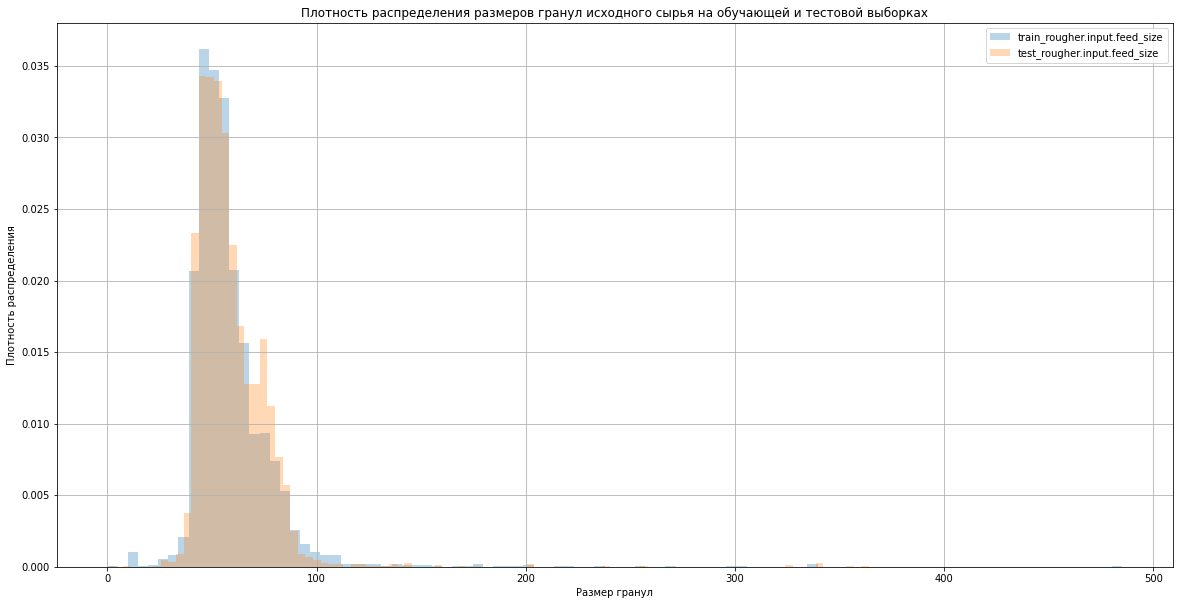

In [28]:
plt.figure(figsize=(20, 10))
plt.title('Плотность распределения размеров гранул исходного сырья на обучающей и тестовой выборках')
plt.hist(df_train['rougher.input.feed_size'], bins=100, alpha = 0.3, density = True, label = 'train_rougher.input.feed_size')
plt.hist(df_test['rougher.input.feed_size'], bins=100, alpha = 0.3, density = True, label = 'test_rougher.input.feed_size')
plt.ylabel('Плотность распределения',size=10)
plt.xlabel('Размер гранул',size=10)
plt.legend()
plt.grid()
plt.show()

Распределение размеров гранул - почти одинаковое. Результаты работы модели не исказятся.

Исследуем суммарную концентрацию металлов на разных стадиях: в сырье, в черновом концентрате, в концентрате после первой очистки и в финальном концентрате.

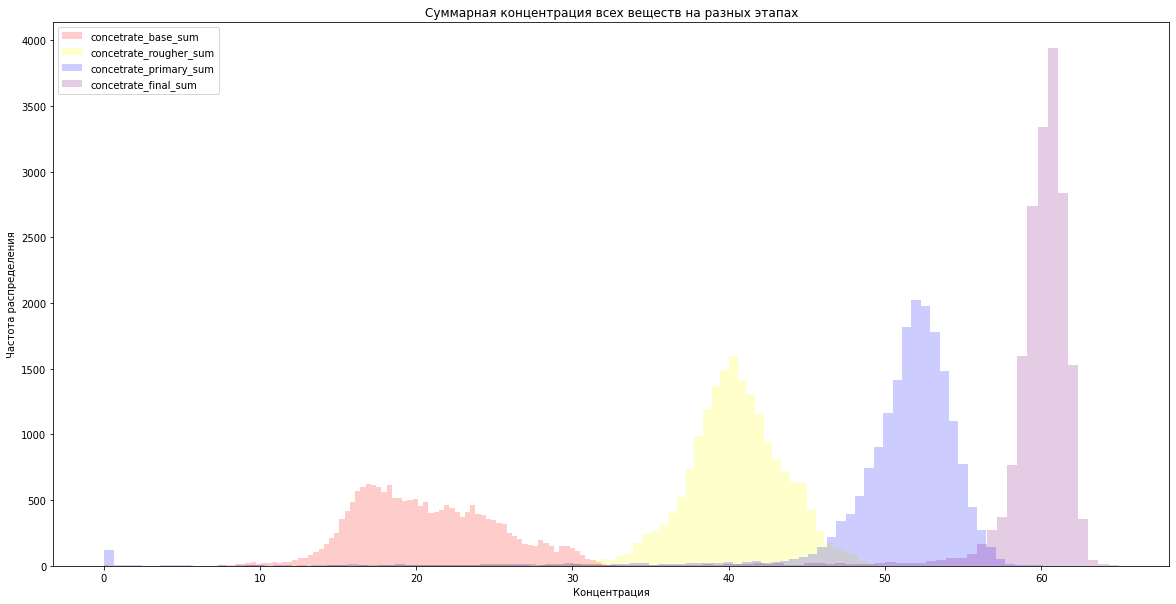

In [29]:
plt.figure(figsize=(20, 10))
df_full['concetrate_base_sum'].plot(kind = 'hist', color='red', alpha = 0.2, label = 'concetrate_base_sum', bins = 100)
df_full['concetrate_rougher_sum'].plot(kind = 'hist', color = 'yellow', alpha = 0.2, label = 'concetrate_rougher_sum', bins = 100)
df_full['concetrate_primary_sum'].plot(kind = 'hist', color='blue', alpha = 0.2, label = 'concetrate_primary_sum', bins = 100)
df_full['concetrate_final_sum'].plot(kind = 'hist', color='purple', alpha = 0.2, label = 'concetrate_final_sum', bins = 100)
plt.title('Суммарная концентрация всех веществ на разных этапах')
plt.ylabel('Частота распределения',size=10)
plt.xlabel('Концентрация',size=10)
plt.legend()
plt.show()

Можно заметить, что с каждой последующей обработкой сырья - уменьшается разброс значений и увеличивается концентрация.

Удаляем ранее добавленные столбцы на стадии подготовки

In [30]:
del df_full['concetrate_base_sum']
del df_full['concetrate_rougher_sum']
del df_full['concetrate_primary_sum']
del df_full['concetrate_final_sum']
del df_train['concetrate_base_sum']
del df_train['concetrate_rougher_sum']
del df_train['concetrate_primary_sum']
del df_train['concetrate_final_sum']

### Вывод
* концентрация золота значительно возросла (с 8,3 до 44,3)
* концентрация серебра упала (среднее упало с 8,8 до 5,2)
* концентрация свинца же немного выросла (с 3,6 до 10,1)
* увеличение, как и уменьшение концентрации после каждого этапа - равномерное
* распределение размеров гранул на тестовой и обучающей выборках - почти одинаковое. Результаты работы модели не исказятся.
* с каждой последующей обработкой сырья - уменьшается разброс значений и увеличивается концентрация

## Модель

Признаки и целевая переменная для обучающей и тестовых выборок. И смотрим на их размер.

In [31]:
columns = df_test.columns
features_train = df_train[columns].drop(['date'],axis=1).reset_index(drop=True) 
target_train = df_train[['rougher.output.recovery','final.output.recovery']].reset_index(drop=True)

In [32]:
df_test_target = df_test.merge(df_full[['rougher.output.recovery','final.output.recovery']],left_on=df_test['date'], right_on=df_full['date'], how='left', suffixes = "_dummy")
features_test = df_test_target[columns].drop(['date'],axis=1).reset_index(drop=True) 
target_test = df_test_target[['rougher.output.recovery','final.output.recovery']].reset_index(drop=True)

In [33]:
display(features_train.shape)
display(target_train.shape)

(13988, 52)

(13988, 2)

In [34]:
display(features_test.shape)
display(target_test.shape)

(4860, 52)

(4860, 2)

Нормализуем выборки

In [35]:
scaler = StandardScaler()
scaler.fit(features_train)

features_train = scaler.transform(features_train)
features_test = scaler.transform(features_test)

Функции расчета метрики качества

In [36]:
def sMAPE_calc(target,predict):
    calc = (np.sum(abs(target - predict) / ((abs(target) + abs(predict)) / 2))) / len(target) * 100
    return calc

In [37]:
def sMAPE(predict,target):
    predict_rougher = predict[:,0]
    target_rougher = target[:,0]
    predict_final = predict[:,1]
    target_final = target[:,1]   
    sMAPE_rougher = sMAPE_calc(target_rougher, predict_rougher)
    sMAPE_final = sMAPE_calc(target_final,predict_final)
    sMAPE = 0.25 * sMAPE_rougher + 0.75 * sMAPE_final
    
    return sMAPE

Оценщик метрики качества

In [38]:
smape_scorer = make_scorer(sMAPE, greater_is_better = False)

С помощью кросс-валидации подбираем наилучшую модель

In [39]:
model = LinearRegression()
score = cross_val_score(model, features_train, np.array(target_train), scoring = smape_scorer).mean()
print('LinearRegression sMAPE:', abs(score))

LinearRegression sMAPE: 8.984996105365715


In [40]:
model = Lasso(random_state = RND_ST, alpha = 0.6)

In [41]:
score = cross_val_score(model, features_train, np.array(target_train), scoring = smape_scorer).mean()
print('LASSO sMAPE:', abs(score))

LASSO sMAPE: 8.028982829677968


In [42]:
model = ElasticNet(random_state = RND_ST, alpha = 0.9, l1_ratio = 0.7)
score = cross_val_score(model, features_train, np.array(target_train), scoring = smape_scorer).mean()
print('ElasticNet sMAPE:', abs(score))

ElasticNet sMAPE: 7.992698661622716


ElasticNet справился лучше всех - попробуем его на тестовой выборке.

In [43]:
model = ElasticNet(random_state = RND_ST, alpha = 0.9, l1_ratio = 0.7)
model.fit(features_train, target_train)
predict = model.predict(features_test)
smape = sMAPE(predict, np.array(target_test))
print('sMAPE лучшей модели ElasticNet:', smape)

sMAPE лучшей модели ElasticNet: 7.34973747485636


In [44]:
model_test = DummyRegressor(strategy = "median")
model_test.fit(features_train, target_train)
predict = model_test.predict(features_test)
smape = sMAPE(predict, np.array(target_test))
print('sMAPE константной модели:', smape)

sMAPE константной модели: 8.294903819577549


### Общий вывод
* rougher.output.recovery в таблице и посчитанный нами - идентичны
* присутствие признаков исключенных из тестовой выборки могли вызвать мультиколлинеарность - соотвественно предсказания модели могли бы быть неточны
* по проведенному анализу можно сказать, что концентрация золота значительно возросла (с 8,3 до 44,3), в то время как концентрация серебра упала (среднее упало с 8,8 до 5,2). Концентрация свинца же немного выросла (с 3,6 до 10,1). Увеличение, как и уменьшение концентрации после каждого этапа - равномерное.
* можно заметить, что с каждой последующей обработкой сырья - уменьшается разброс значений и увеличивается концентрация.
* sMAPE лучшей модели ElasticNet: 7.34973747485636 на тестовой выборке. И ElasticNet sMAPE: 7.992698661622716 на обучающей выборке.
* sMAPE константной модели: 8.294903819577549.